# Week 2

As explained in the [Before week 1: How to take this class](https://nbviewer.org/github/suneman/socialdata2022/blob/main/lectures/How_To_Take_This_Class.ipynb) notebook, each week of this class is an Jupyter notebook like this one. In order to follow the class, you simply start reading from the top, following the instructions.

Hint: you can ask us - Anna or any of the friendly Teaching Assistants - for help at any point if you get 
stuck!

**New Info**: Remember that this week is also the time to learn a bit about how the the assignments and the final project work. So if you havn't already, check out the [Before week 2: Assignments and Final Project](https://github.com/suneman/socialdata2022/blob/main/lectures/Assignments_And_Final_Project.ipynb) notebook.

## Overview

Today's lecture has 3 parts. 
* First we'll give you an introduction to data visualization with a little data visualization exercise and a video from Sune. 
* As the main event, we will work with crime-data and generate a large number of interesting and informative plots. 
* Finally - in the last part - we'll play around with visualizing the geo-data contained in the CSV file.

## Part 1: A little visualization exercise

Start by downloading these four datasets: [Data 1](https://raw.githubusercontent.com/suneman/socialdata2022/main/files/data1.tsv), [Data 2](https://raw.githubusercontent.com/suneman/socialdata2022/main/files/data2.tsv), [Data 3](https://raw.githubusercontent.com/suneman/socialdata2022/main/files/data3.tsv), and [Data 4](https://raw.githubusercontent.com/suneman/socialdata2022/main/files/data4.tsv). The format is `.tsv`, which stands for _tab separated values_. 
As you will later realize, these are famous datasets!
Each file has two columns (separated using the tab character). The first column is $x$-values, and the second column is $y$-values.  

It's ok to just download these files to disk by right-clicking on each one, but if you use Python and `urllib` or `urllib2` to get them, I'll really be impressed. If you don't know how to do that, I recommend opening up Google and typing "download file using Python" or something like that. When interpreting the search results remember that _stackoverflow_ is your friend.

Now, to the exercise:

> *Exercise 1.1*: 
> 
> * Using the `numpy` function `mean`, calculate the mean of both $x$-values and $y$-values for each dataset. 
>      * Use python string formatting to print precisely two decimal places of these results to the output cell. Check out [this _stackoverflow_ page](http://stackoverflow.com/questions/8885663/how-to-format-a-floating-number-to-fixed-width-in-python) for help with the string formatting. 
> * Now calculate the variance for all of the various sets of $x$- and $y$-values, by using the `numpy` function `var`. Print it to three decimal places.
> * Use `numpy` to calculate the [Pearson correlation](https://en.wikipedia.org/wiki/Pearson_product-moment_correlation_coefficient) between $x$- and $y$-values for all four data sets (also print to three decimal places).
> * The next step is use _linear regression_ to fit a straight line $f(x) = a x + b$ through each dataset and report $a$ and $b$ (to two decimal places). An easy way to fit a straight line in Python is using `scipy`'s `linregress`. It works like this
> ```
> from scipy import stats
> slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
>```
> * Comment on the results from the previous steps. What do you observe? 
> * Finally, it's time to plot the four datasets using `matplotlib.pyplot`. Use a two-by-two [`subplot`](http://matplotlib.org/examples/pylab_examples/subplot_demo.html) to put all of the plots nicely in a grid and use the same $x$ and $y$ range for all four plots. And include the linear fit in all four plots. (To get a sense of what I think the plot should look like, you can take a look at my version [here](https://raw.githubusercontent.com/suneman/socialdata2022/main/files/anscombe.png).)
> * Explain - in your own words - what you think my point with this exercise is (see below for tips on this).


Get more insight in the ideas behind this exercise by reading [here](https://en.wikipedia.org/wiki/Anscombe%27s_quartet). Here you can also get an explanation of why the datasets are actually famous - I mean they have their own Wikipedia page!!

And the video below generalizes in the coolest way imaginable. It's a treat, but don't watch it until **after** you've done the exercises - and read the Wikipedia page. **Note:** Uncomment the line in the cell below to watch the video!

In [2]:
import numpy as np
import pandas as pd

data1 = 'https://raw.githubusercontent.com/suneman/socialdata2022/main/files/data1.tsv'
data2 = 'https://raw.githubusercontent.com/suneman/socialdata2022/main/files/data2.tsv'
data3 = 'https://raw.githubusercontent.com/suneman/socialdata2022/main/files/data3.tsv'
data4 = 'https://raw.githubusercontent.com/suneman/socialdata2022/main/files/data4.tsv'
df1 = pd.read_csv(data1, sep='\t', header=None, names=['x', 'y'])
df2 = pd.read_csv(data2, sep='\t', header=None, names=['x', 'y'])
df3 = pd.read_csv(data3, sep='\t', header=None, names=['x', 'y'])
df4 = pd.read_csv(data4, sep='\t', header=None, names=['x', 'y'])

df_lst = [df1, df2, df3, df4]

In [3]:
for i, df in enumerate(df_lst):
    print(f"Dataset {i + 1} x-mean: {np.mean(df['x']):.2f} | y-mean: {np.mean(df['y']):.2f}")

Dataset 1 x-mean: 9.00 | y-mean: 7.50
Dataset 2 x-mean: 9.00 | y-mean: 7.50
Dataset 3 x-mean: 9.00 | y-mean: 7.50
Dataset 4 x-mean: 9.00 | y-mean: 7.50


In [4]:
for i, df in enumerate(df_lst):
    print(f"Dataset {i + 1} x-var: {np.var(df['x']):.3f} | y-var: {np.var(df['y']):.3f}")

Dataset 1 x-var: 10.000 | y-var: 3.752
Dataset 2 x-var: 10.000 | y-var: 3.752
Dataset 3 x-var: 10.000 | y-var: 3.748
Dataset 4 x-var: 10.000 | y-var: 3.748


In [5]:
for i, df in enumerate(df_lst):
    print(f"Dataset {i + 1} pearson correlation between x and y: {np.corrcoef(df['x'], df['y'])[0, 1]:.3f}")

Dataset 1 pearson correlation between x and y: 0.816
Dataset 2 pearson correlation between x and y: 0.816
Dataset 3 pearson correlation between x and y: 0.816
Dataset 4 pearson correlation between x and y: 0.817


In [6]:
from scipy import stats

lr_lst = []
for i, df in enumerate(df_lst):
    print(f"Dataset {i + 1}")
    slope, intercept, r_value, p_value, std_err = stats.linregress(df['x'], df['y'])
    print(f'y = {slope:.2f}x + {intercept:.2f}')

    lr_lst.append(lambda x: slope * x + intercept)

Dataset 1
y = 0.50x + 3.00
Dataset 2
y = 0.50x + 3.00
Dataset 3
y = 0.50x + 3.00
Dataset 4
y = 0.50x + 3.00


We observe that the statistical measures are almost exactly the same for all datasets. The straight line (linear regression) fit also provided the same line for each dataset.

In [7]:
df_lst[0]['x'].sort_values()

7      4
10     5
6      6
9      7
1      8
3      9
0     10
4     11
8     12
2     13
5     14
Name: x, dtype: int64

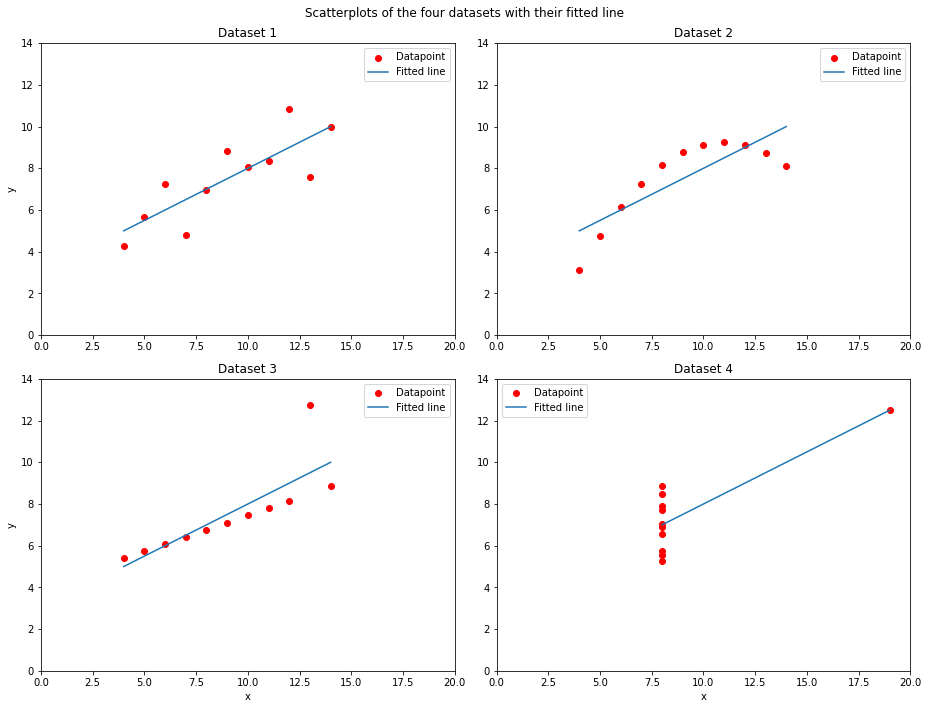

In [8]:
# I would probably use a different library than matplotlib, but it's given by the exercise..
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,2, figsize=(13,10))

i = 0
for ax_col in axs:
    for ax_row in ax_col:
        df = df_lst[i]
        ax_row.scatter(df.x, df.y, c='red', label='Datapoint')

        linear_reg = lr_lst[i]
        ax_row.plot(df.x.sort_values(), linear_reg(df.x.sort_values()), label="Fitted line")

        ax_row.legend()
        ax_row.set_title(f"Dataset {i + 1}")
        if i > 1:
            ax_row.set_xlabel('x')

        if i in [0, 2]:
            ax_row.set_ylabel('y')

        ax_row.set_xlim([0, 20])
        ax_row.set_ylim([0, 14])
        i += 1

plt.suptitle('Scatterplots of the four datasets with their fitted line')

plt.tight_layout()
plt.show()

The point of the exercise is to show that even if all the numbers indicate that this is the SAME dataset. When we visualize the datapoints, we quickly see that the datasets are NOT the same. Actually they differ quite significantly from each other. Therefore, it is not enough to just look at the statistical measures to identify and explain datasets but we must also use qualitative visualization techniques.

In [9]:
from IPython.display import YouTubeVideo
#Uncomment the following line to watch the video
#YouTubeVideo("DbJyPELmhJc",width=800, height=450)

Now that you get a better sense of why data visualization is an important and powerful tool, you are ready to get a small intro on the topic! Again, don't watch the video until **after** you've done exercise 1.1 

[![IMAGE ALT TEXT HERE](https://img.youtube.com/vi/9D2aI30AMhM/0.jpg)](https://www.youtube.com/watch?v=9D2aI30AMhM)

> *Excercise 1.2:* Questions for the lecture
> * What is the difference between *data* and *metadata*? How does that relate to the GPS tracks-example?
> * Sune says that the human eye is a great tool for data analysis. Do you agree? Explain why/why not. Mention something that the human eye is very good at. Can you think of something that [is difficult for the human eye](http://cdn.ebaumsworld.com/mediaFiles/picture/718392/84732652.jpg). Explain why your example is difficult. 
> * Simpson's paradox is hard to explain. Come up with your own example - or find one on line.
> * In your own words, explain the difference between *exploratory* and *explanatory* data analysis.


* _Data_ is the actual values of what we want to describe. _Metadata_ is the data describing the data, thus a more descriptive manner and often a 'label' that can describe what the numbers mean (Jason) such as latitude and longitude. Metadata can also contain information about the dataset in general and not only the individual values. Such as author, time of sampling, data location and so on.
* The human eye is amazing for analysis. As showed in the previous exercise, if we had just plotted the data first, we would've saved all this time of calculating statistical values, as the human eye would've instantly found the pattern across the four datasets. This is often the case, that we want to visualize data before deep-diving into statistics and modelling. The saying: a picture is a 1000 words applies very much here. Meaning that, _given a good and simple visualization of data_, the human eye can capture simple patterns and abnormalities way faster than a computer (until a given size). However, if the visualization is clunky and messy to look at, the human eye would not be of much use. Such an example would be finding the maximum value in a 1000 row table. Since there is no clear distinction between the values such as color, it is extremely difficult for the human eye to find the maximum value fast. Therefore, it is important to learn how to create excellent, clear and informative visualizations.
* Simpson's paradox says that the trend of separated groups disappears or becomes reverse when aggregating across groups. One example could be the university of california admission rates where men were accepted more than women (44% vs 35%). However, looking at each department, women were usually accepted at a rate equal to or higher than the rate at which men were accepted. In fact, women tended to apply to departments which were harder to be admitted into.
* _Exploratory_ aims to explore the data and find patterns, gain insights and create hypothesis. _Explanatory_ explains the data to a user and communicates knowledge found from the dataset.

## Part 2: Visualizing patterns in the data

Visualizing data is a powerful technique that helps us exploiting the human eye, and make complex patterns easier to identify. 

Let's see if we can detect any interesting patterns in the big crime-data file from San Francisco you downloaded last week. We'll again only look at the focus-crimes.

In [10]:
focuscrimes = {'WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT',
               'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT',
               'STOLEN PROPERTY', 'DISORDERLY CONDUCT'}

### Exercise 2.1

> *Exercise 2.1*: More temporal patterns. Last time we plotted the development over time (how each of the focus crimes changed over time, year-by-year). Today we'll start by looking at the developments across the months, weekdays, and across the 24 hours of the day.
>
> **Note:** restrict yourself to the dataset of *entire years*.
>
> * *Weekly patterns*. Basically, we'll forget about the yearly variation and just count up what happens during each weekday. [Here's what my version looks like](https://raw.githubusercontent.com/suneman/socialdata2022/main/files/weekdays.png). Some things make sense - for example `drunkenness` and the weekend. But there are some aspects that were surprising to me. Check out `prostitution` and mid-week behavior, for example!?
> * *The months*. We can also check if some months are worse by counting up number of crimes in Jan, Feb, ..., Dec. Did you see any surprises there?
> * *The 24 hour cycle*. We can also forget about weekday and simply count up the number of each crime-type that occurs in the dataset from midnight to 1am, 1am - 2am ... and so on. Again: Give me a couple of comments on what you see. 
> * *Hours of the week*. But by looking at just 24 hours, we may be missing some important trends that can be modulated by week-day, so let's also check out the 168 hours of the week. So let's see the number of each crime-type Monday night from midninght to 1am, Monday night from 1am-2am - all the way to Sunday night from 11pm to midnight.


In [11]:
df_raw = pd.read_csv('Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv')

In [12]:
df_raw.Date = pd.to_datetime(df_raw['Date']) + pd.to_timedelta(df_raw['Time'] + ':00')
df_raw = df_raw[df_raw.Date.dt.year < 2018]
df = df_raw[df_raw.Category.isin(focuscrimes)]
print(f'Years in dataset: {pd.unique(df.Date.dt.year)}')
print(f'Categories in dataset: {pd.unique(df.Category)}')

Years in dataset: [2003 2005 2006 2007 2004 2016 2017 2014 2015 2012 2010 2009 2011 2013
 2008]
Categories in dataset: ['LARCENY/THEFT' 'ASSAULT' 'VEHICLE THEFT' 'BURGLARY'
 'DRIVING UNDER THE INFLUENCE' 'VANDALISM' 'DRUNKENNESS' 'ROBBERY'
 'TRESPASS' 'STOLEN PROPERTY' 'DRUG/NARCOTIC' 'PROSTITUTION'
 'DISORDERLY CONDUCT' 'WEAPON LAWS']


#### Weekly patterns

In [13]:
import seaborn as sns

In [14]:
sorter = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
sorterIndex = dict(zip(sorter,range(len(sorter))))
sorterIndex

{'Monday': 0,
 'Tuesday': 1,
 'Wednesday': 2,
 'Thursday': 3,
 'Friday': 4,
 'Saturday': 5,
 'Sunday': 6}

C:\ProgramData\Anaconda3\envs\socialdata\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


Text(0.5, 0.98, 'N. of crimes per week-day by category')

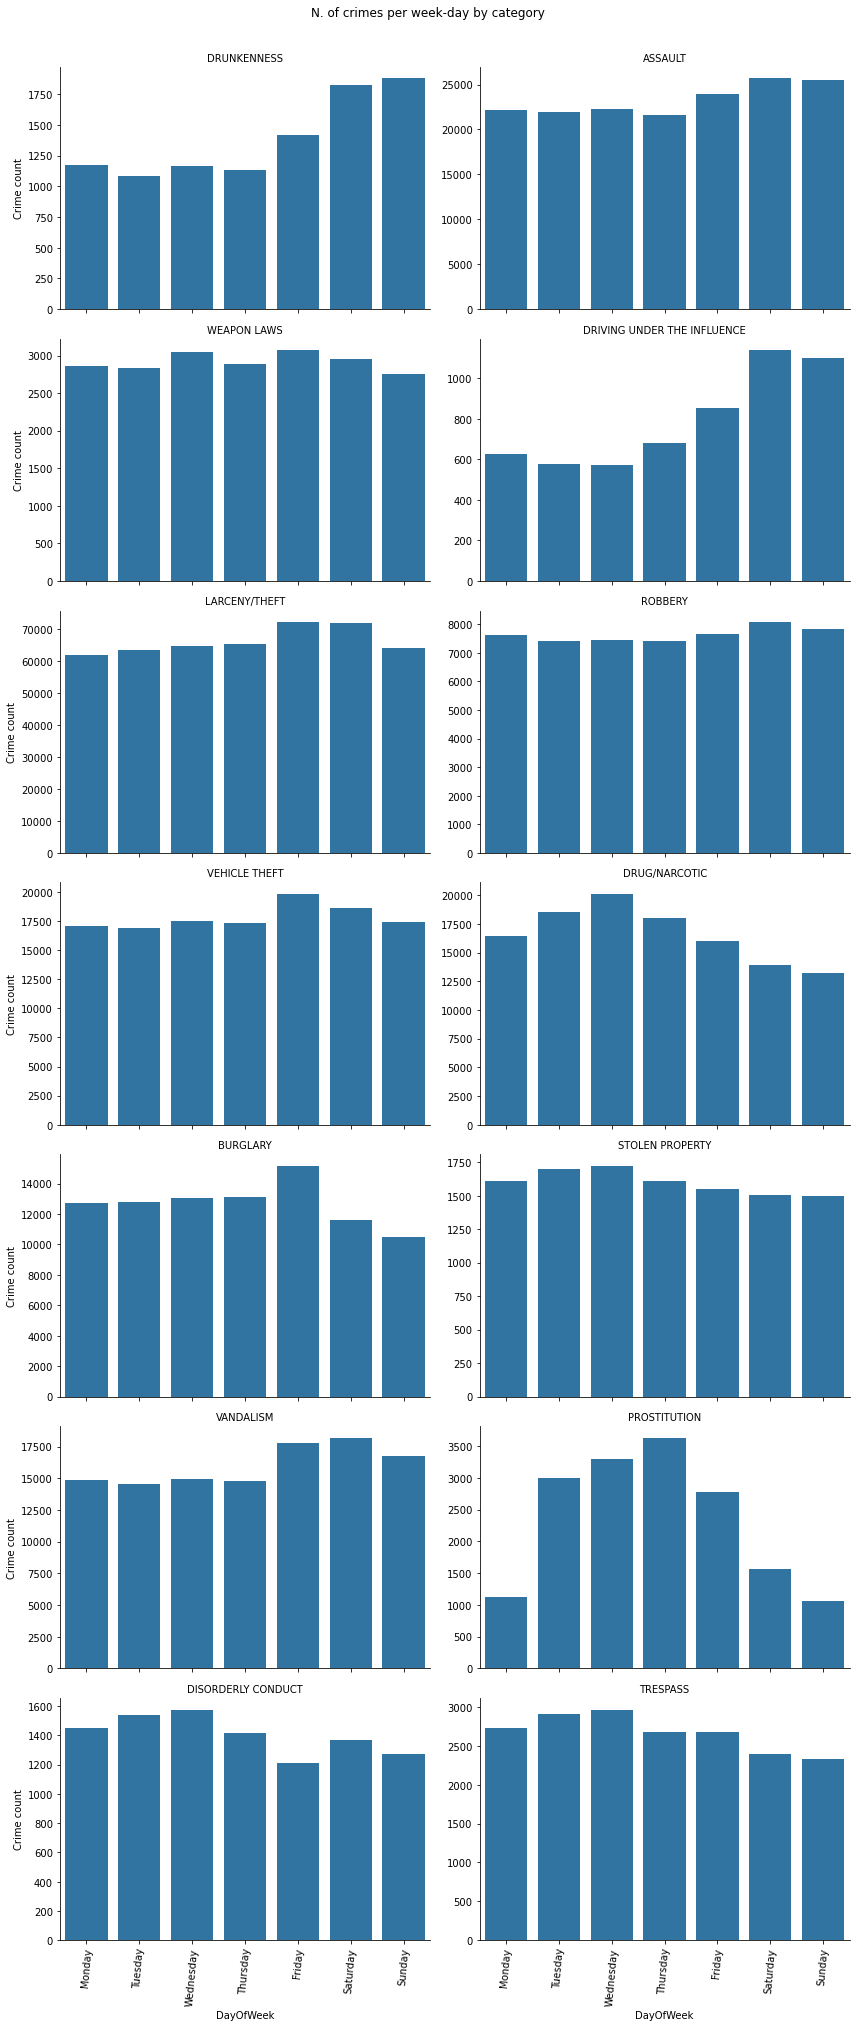

In [15]:
df_plot = df.groupby([df.Category, df.DayOfWeek]).count().IncidntNum.reset_index()
df_plot['sort_idx'] = df_plot.DayOfWeek
df_plot['sort_idx'] = df_plot['sort_idx'].map(sorterIndex)
df_plot = df_plot.sort_values('sort_idx')

g = sns.FacetGrid(df_plot, col='Category', height=4, aspect=1.5, col_wrap=2, sharey=False)
g.map(sns.barplot, "DayOfWeek", "IncidntNum")
g.set_ylabels('Crime count')
g.set_titles('{col_name}')
g.set_xticklabels(rotation=85)
g.fig.subplots_adjust(top=.95)
g.fig.suptitle('N. of crimes per week-day by category')

Patterns in this visualization show more burglary on friday's, more prostitution in the middle of the week!, vehicle theft on fridays and drunkness on weekends. Funny enough, more people are caught with driving under the influence on a saturday probably due to hangovers haha. Finally, people like to do drugs in the middle of the week instead of the weekends, at least those who get caught do.

#### The months

C:\Users\moeso\AppData\Local\Temp/ipykernel_11188/2914061363.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.Month = df.Date.dt.month_name()
C:\ProgramData\Anaconda3\envs\socialdata\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


Text(0.5, 0.98, 'N. of crimes per month by category')

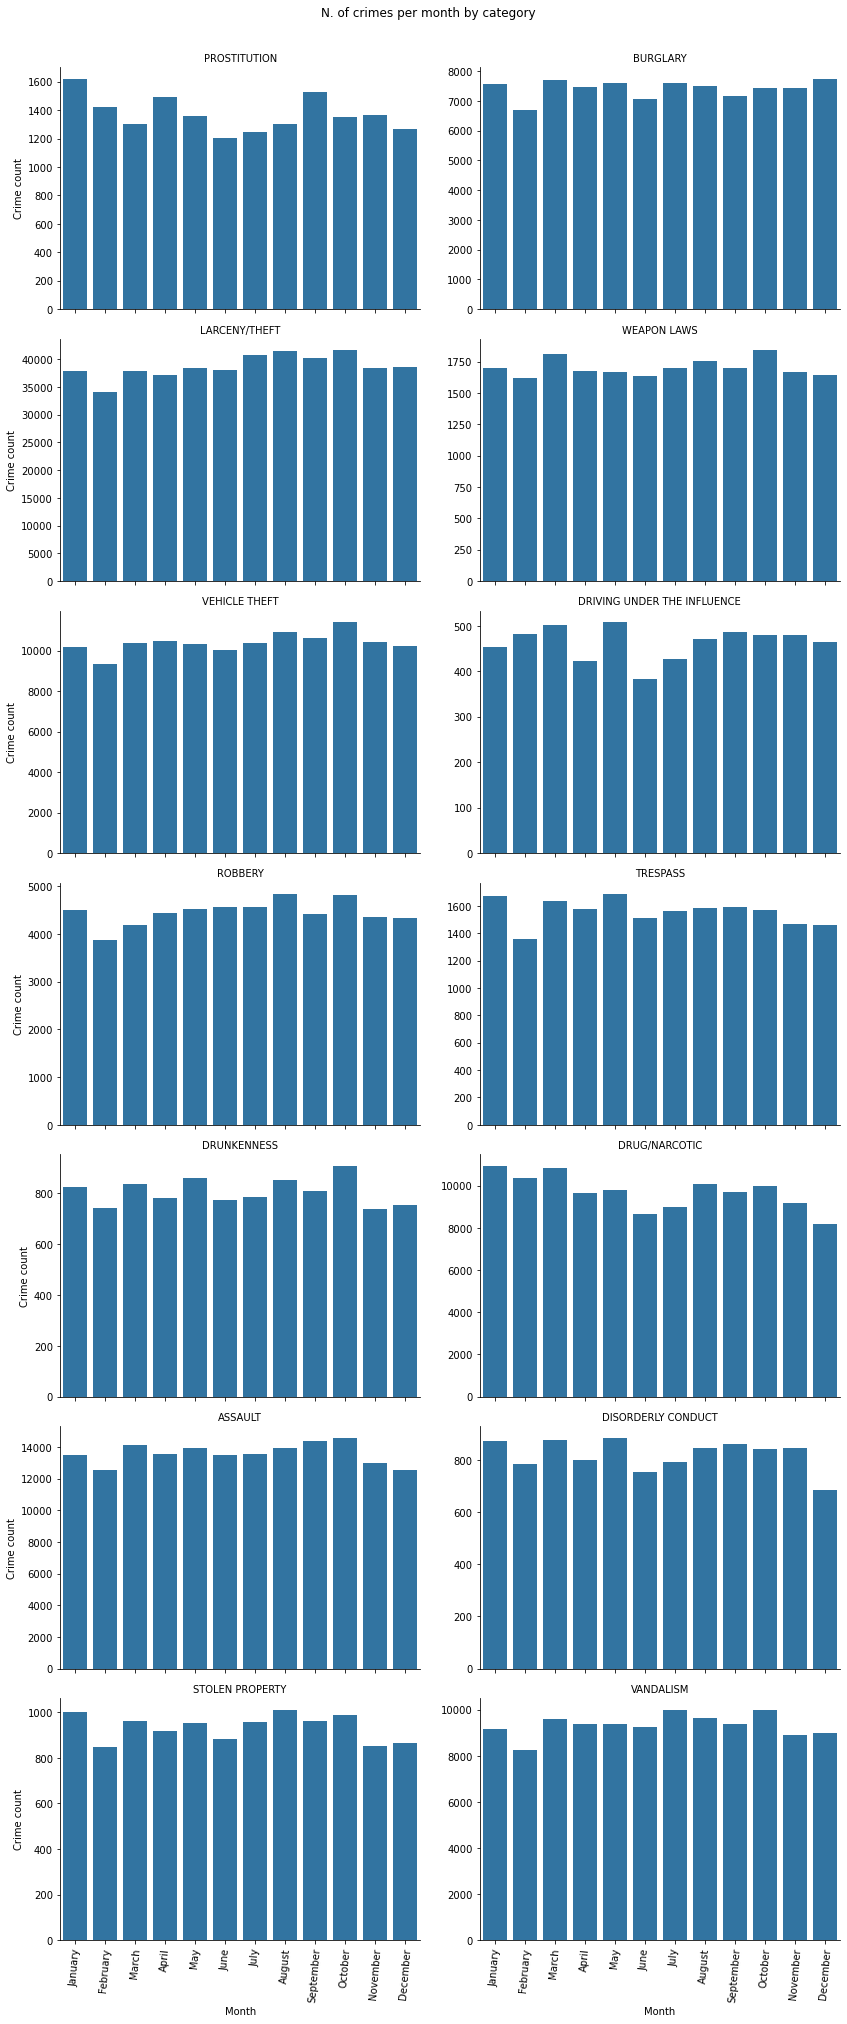

In [16]:
df.Month = df.Date.dt.month_name()
df_plot = df.groupby([df.Category, df.Month]).count().IncidntNum.reset_index()
df_plot['datetime'] = pd.to_datetime(df_plot.Date, format='%B')
df_plot = df_plot.sort_values('datetime')

g = sns.FacetGrid(df_plot, col='Category', height=4, aspect=1.5, col_wrap=2, sharey=False)
g.map(sns.barplot, "Date", "IncidntNum")
g.set_ylabels('Crime count')
g.set_xlabels('Month')
g.set_titles('{col_name}')
g.set_xticklabels(rotation=85)
g.fig.subplots_adjust(top=.95)
g.fig.suptitle('N. of crimes per month by category')

There aren't any significant surprises across the different months. However, a general trend seems to be that there are more crimes in January than February. For almost all categories except Driving under the influence. I guess the criminals also have new year's resolutions but lose consistency just like everyone else.

#### The 24 hour cycle

C:\ProgramData\Anaconda3\envs\socialdata\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


Text(0.5, 0.98, 'N. of crimes per hour by category')

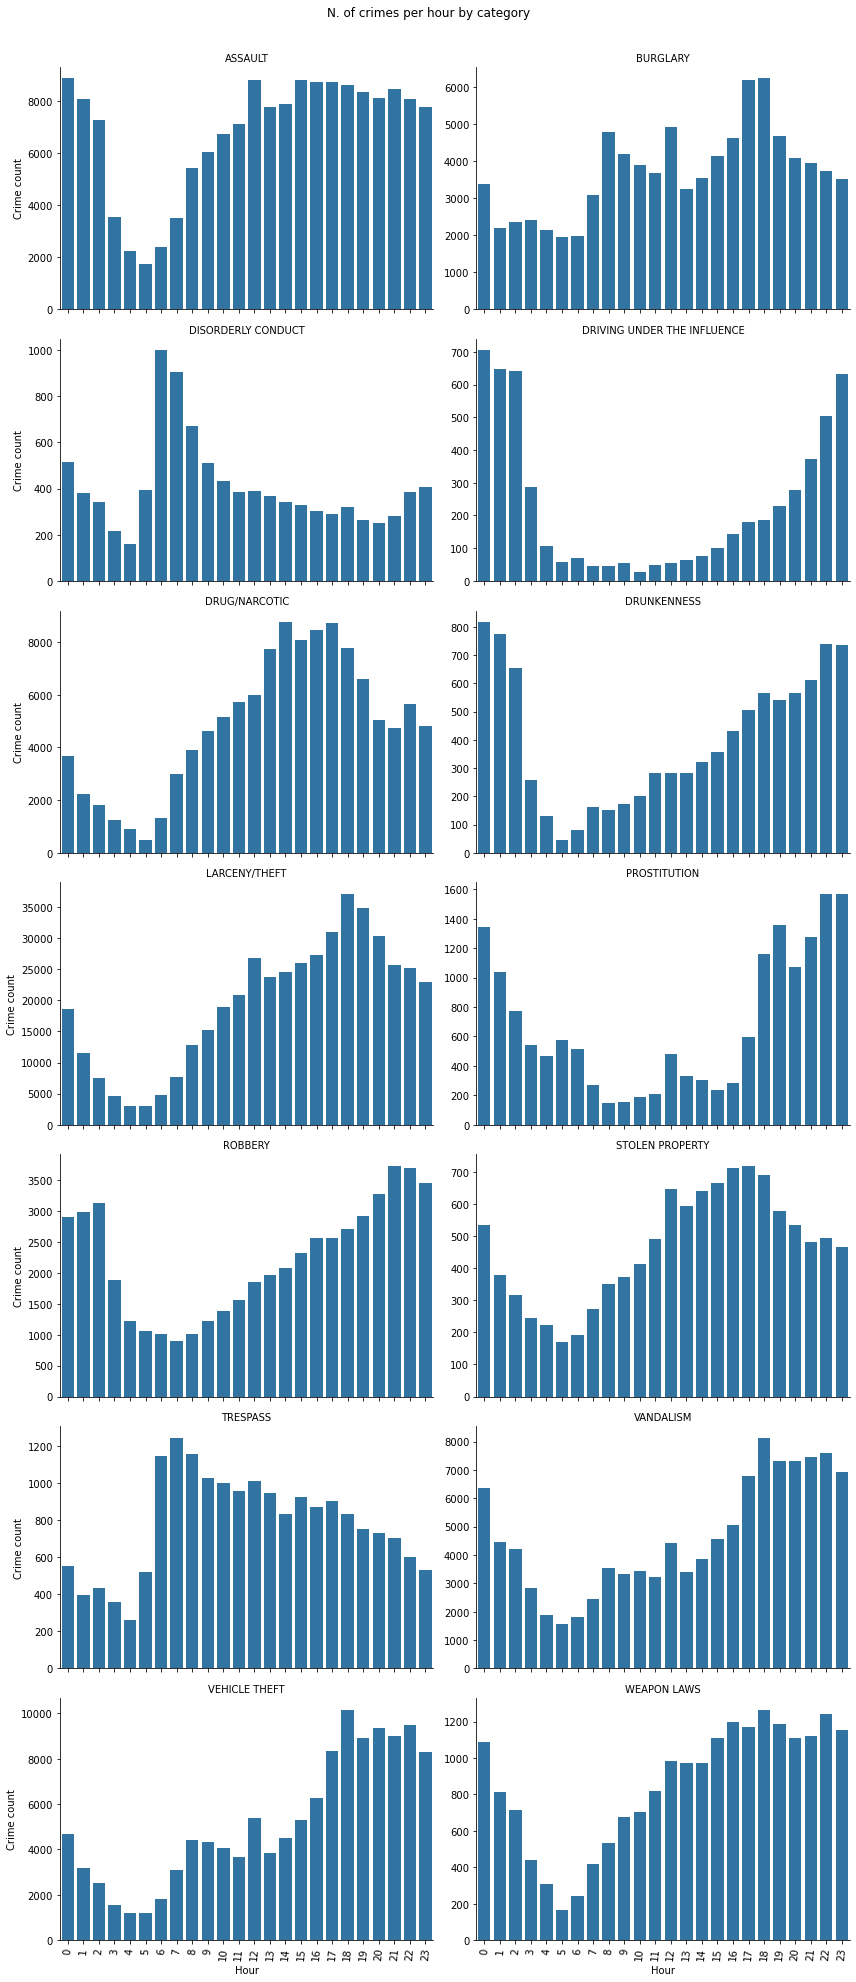

In [17]:
df_plot = df.groupby([df.Category, df.Date.dt.hour]).count().IncidntNum.reset_index()

g = sns.FacetGrid(df_plot, col='Category', height=4, aspect=1.5, col_wrap=2, sharey=False)
g.map(sns.barplot, "Date", "IncidntNum")
g.set_ylabels('Crime count')
g.set_xlabels('Hour')
g.set_titles('{col_name}')
g.set_xticklabels(rotation=85)
g.fig.subplots_adjust(top=.95)
g.fig.suptitle('N. of crimes per hour by category')

While most crimes drop in the night hours around 2-6, crimes such as Burglary stay at a constant throughout the night. Moreover, most robbery and assault charges happen during the early night around 22-03. Moreover, we can see that driving under the influence is at its peak right after people are done partying, around 00 to 03. Finally, disorderly conduct is most apparent very early in the morning around 6 oclock.

#### Hours of the week

In [18]:
df['hour_of_the_week'] = df['Date'].dt.dayofweek * 24 + df['Date'].dt.hour

C:\Users\moeso\AppData\Local\Temp/ipykernel_11188/3043228246.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour_of_the_week'] = df['Date'].dt.dayofweek * 24 + df['Date'].dt.hour


C:\ProgramData\Anaconda3\envs\socialdata\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


Text(0.5, 0.98, 'N. of crimes per hour of the week by category')

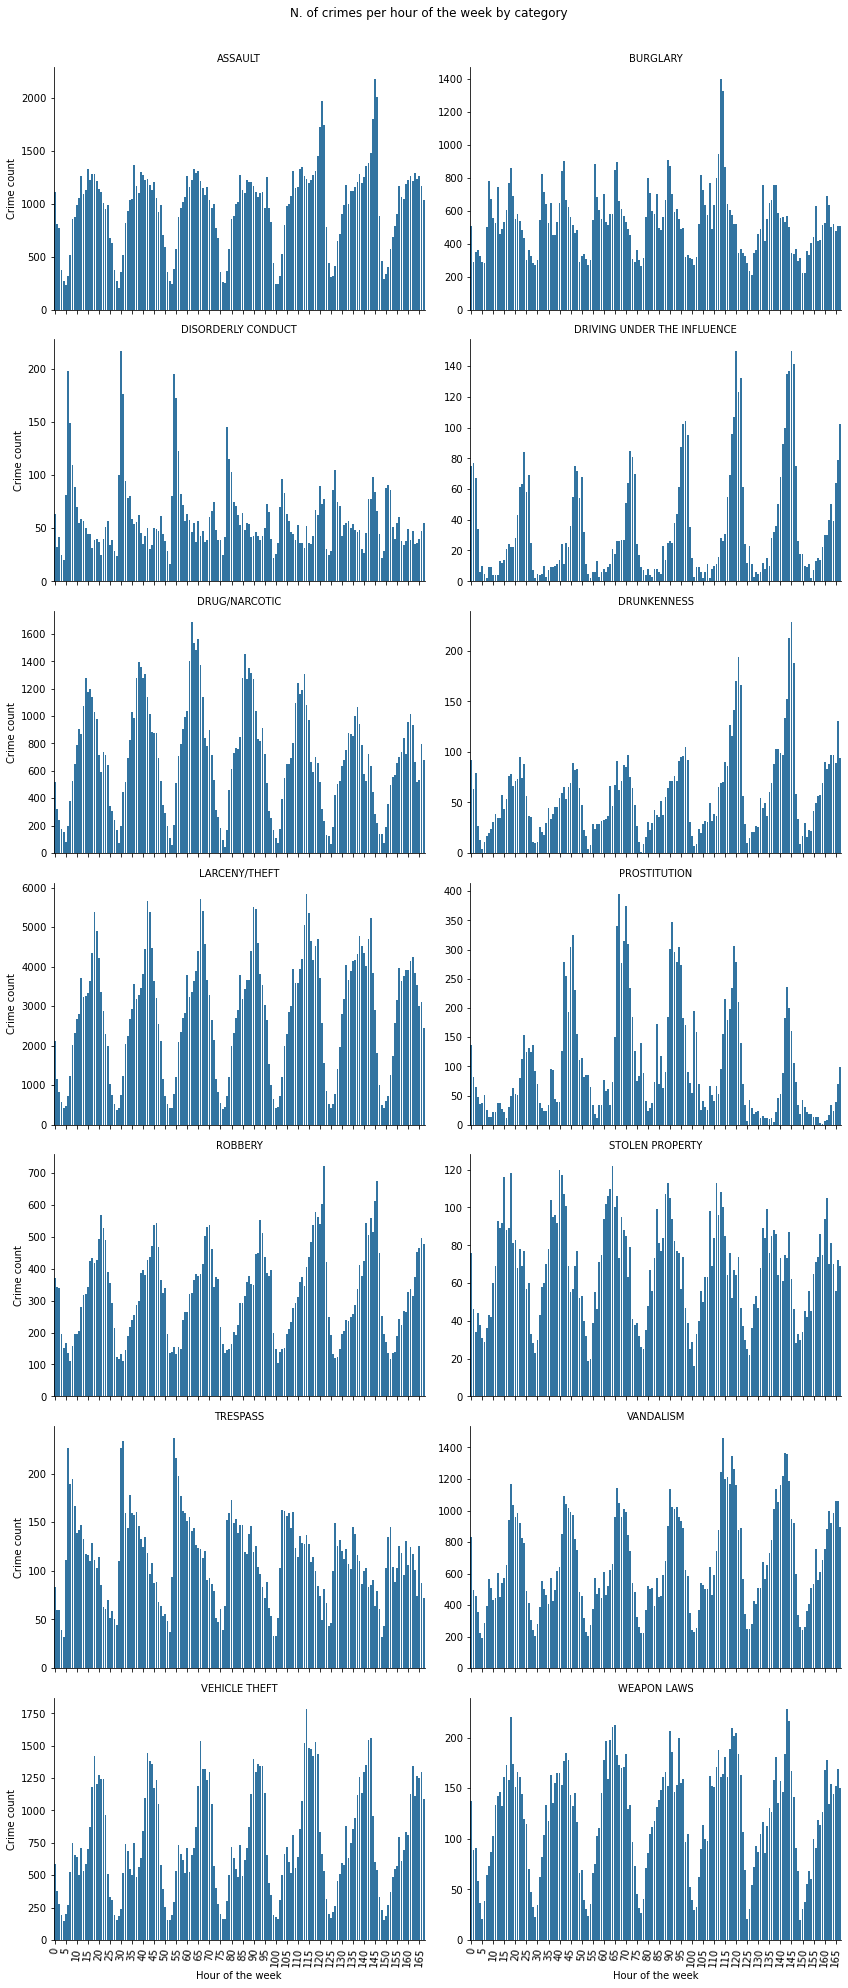

In [19]:
import matplotlib.ticker as ticker

df_plot = df.groupby([df.Category, df.hour_of_the_week]).count().IncidntNum.reset_index()

g = sns.FacetGrid(df_plot, col='Category', height=4, aspect=1.5, col_wrap=2, sharey=False)
g.map(sns.barplot, "hour_of_the_week", "IncidntNum")
g.set_ylabels('Crime count')
g.set_xlabels('Hour of the week')
g.set_titles('{col_name}')

g.set_xticklabels(rotation=85)
for ax in g.axes:
    ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
    ax.xaxis.set_major_formatter(ticker.ScalarFormatter())

g.fig.subplots_adjust(top=.95)
g.fig.suptitle('N. of crimes per hour of the week by category')

This plot is essentially a higher resolution plot of the 'weekly patterns' where we in addition to seeing the trends pr day of the week, we also see the hours per each day of the week. Overall, it shows the same patterns as the weekly patterns. However, we are able to spot a few patterns that were not apparent in the other plot. Such as disorderly conduct happening mostly in the first 3 days of the week in the morning. Moreover, the number of assaults also increase during the night on Friday's and Saturday's. Also, we know that there are more burglaries on Friday, but now we see that they happen late in the day.

### Exercise 2.2

The next thing we'll be looking into is how crimes break down across the 10 districts in San Francisco.

> *Exercise 2.2*: The types of crime and how they take place across San Francisco's police districts.
>  
>  * So now we'll be combining information about `PdDistrict` and `Category` to explore differences between SF's neighborhoods. First, simply list the names of SF's 10 police districts.
>  * Which has the most crimes? Which has the most focus crimes?
>  * Next, we want to generate a slightly more complicated graphic. I'm interested to know if there are certain crimes that happen much more in certain neighborhoods than what's typical. Below I describe how to get that plot going:
>    - First, we need to calculate the relative probabilities of seeing each type of crime in the dataset as a whole. That's simply a normalized version of [this plot](https://raw.githubusercontent.com/suneman/socialdata2022/main/files/CrimeOccurrencesByCategory.png). Let's call it `P(crime)`.
>    - Next, we calculate that same probability distribution _but for each PD district_, let's call that `P(crime|district)`.
>    - Now we look at the ratio `P(crime|district)/P(crime)`. That ratio is equal to 1 if the crime occurs at the same level within a district as in the city as a whole. If it's greater than one, it means that the crime occurs _more frequently_ within that district. If it's smaller than one, it means that the crime is _rarer within the district in question_ than in the city as a whole.
>    - For each district plot these ratios for the 14 focus crimes. My plot looks like this
> [Histograms](https://raw.githubusercontent.com/suneman/socialdata2022/main/files/conditional.png "histograms")
>    - Comment on the top crimes in _Tenderloin_, _Mission_, and _Richmond_. Does this fit with the impression you get of these neighborhoods on Wikipedia?

**Comment**. Notice how much awesome datascience (i.e. learning about interesting real-world crime patterns) we can get out by simply counting and plotting (and looking at ratios). Pretty great, right? However, when generating meaningful visualizations, we need to be wary of *perceptual errors*. We'll have a look at this in the final exercise while also having fun with some geodata!

In [20]:
pd.unique(df_raw.PdDistrict)

array(['SOUTHERN', 'NORTHERN', 'CENTRAL', 'TARAVAL', 'BAYVIEW', 'MISSION',
       'RICHMOND', 'PARK', 'INGLESIDE', 'TENDERLOIN', nan], dtype=object)

In [21]:
df_raw.PdDistrict.value_counts()

SOUTHERN      382254
MISSION       282656
NORTHERN      260340
CENTRAL       215909
BAYVIEW       201611
TENDERLOIN    184148
INGLESIDE     177567
TARAVAL       152236
PARK          117351
RICHMOND      110393
Name: PdDistrict, dtype: int64

The Southern district has the most crimes

In [22]:
df.PdDistrict.value_counts()

SOUTHERN      221507
NORTHERN      167984
MISSION       159065
CENTRAL       135864
BAYVIEW       109603
TENDERLOIN    103369
INGLESIDE      99392
TARAVAL        86292
PARK           66385
RICHMOND       65291
Name: PdDistrict, dtype: int64

Also the southern has most focus crimes. However, now northern is second and mission is third.

In [23]:
# Probability of crime per category
P_crime = df.groupby('Category').count()['IncidntNum'] / len(df)
P_crime = P_crime.rename('Prob')

In [ ]:
# Count of crimes per category for each district
P_crime_district = (df.groupby(['PdDistrict', 'Category']).count()['IncidntNum']).reset_index()

# Crimes per district to normalize per district
crimes_pr_district = P_crime_district.groupby('PdDistrict').sum().to_dict()['IncidntNum']

In [ ]:
# Normalize per district
P_crime_district['Prob'] = P_crime_district.apply(lambda x: x.IncidntNum / crimes_pr_district[x.PdDistrict], axis=1)

In [ ]:
P_crime_district.Prob.sum()

We have 10 districts, so the sum of probabilities should be 10.

In [ ]:
P_ratio = P_crime_district.join(P_crime, on='Category', lsuffix='District', rsuffix='City')
P_ratio['Ratio'] = P_ratio.ProbDistrict / P_ratio.ProbCity

In [ ]:
P_ratio.head()

In [ ]:
g = sns.FacetGrid(P_ratio, col='PdDistrict', height=4, aspect=1.5, col_wrap=2, sharey=False)
g.map(sns.barplot, "Category", "Ratio")

for ax in g.axes:
    ax.axhline(1, color='red')

g.set_ylabels('Ratio')
g.set_xlabels('Category')
g.set_titles('{col_name}')
g.set_xticklabels(rotation=85)
g.fig.subplots_adjust(top=.95)
g.fig.suptitle('P(crime|district) / P(crime)')

For _Tenderloin_ it seems that there is a high use of drugs and narcotic. This seems to make sense as it is described as having a high level of homelessness and crime on Wikipedia. _Mission_ has a lot of Chicano/Mexican-American citizens as described on Wikipedia, and it seems that most prostitution in the city happens in this district. I don't know if this fits any stereotypes or previous knowledge, it may just be a coincidence or show of poverty. Finally, _Richmond_ shows a lot of drunk driving which makes sense as Wikipedia mentions it has strong Irish and Russian roots.

## Part 3: Visualizing geodata with Plotly

So visualizing geodata used to be difficult, but with `Plotly` things have gotten easier. 

Like matplotlib, Plotly is an [open-source data visualization library](https://plotly.com/python/), but it's aimed at making interactive visualizations that can be rendered in a web browser (or jupyter notebook). You can read about it and learn how to install it [here](https://plotly.com/python/getting-started/).

That means that we can easily draw on the fact that the crime data has lots of exciting geo-data attached. The map we're going to be creating is called a **[choropleth map](https://en.wikipedia.org/wiki/Choropleth_map)** (more on these later), which is basically a map, where we color in shapefiles (more on this below) based on some value that we care about. We'll take our inspiration from Plotly's gentle intro to [Choropleth maps](https://plotly.com/python/mapbox-county-choropleth/)

The thing we want to look into is the SF police districts, shown below (image stolen from [this page](https://hoodline.com/2015/07/citywide-sfpd-redistricting-to-take-effect-sunday/)).

![districts from web](https://raw.githubusercontent.com/suneman/socialdata2021/master/files/sfpdfinal.png)

But because we are cool programmers, we want to create our own maps, **with our own information on them**. Let's do it!

> *Exercise 3a*: Let's plot a map with some random values in it.
>
> What we need to do to get going is to create some random data. Below is a little dictionary with a random value for each district that you can use if you want your plots to look like mine.

In [ ]:
randomdata = {'CENTRAL': 0.8903601342256143,
              'SOUTHERN': 0.8642882941363439,
              'BAYVIEW': 0.925634097746596,
              'MISSION': 0.7369022697287458,
              'PARK': 0.9864113307070926,
              'RICHMOND': 0.5422239624697017,
              'INGLESIDE': 0.5754056712571605,
              'TARAVAL': 0.5834730737348696,
              'NORTHERN': 0.08148199528212985,
              'TENDERLOIN': 0.37014287986350447};

In [ ]:
from urllib.request import urlopen
import json
with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
    counties = json.load(response)

import pandas as pd
df_geo = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/fips-unemp-16.csv",
                 dtype={"fips": str})

import plotly.express as px

fig = px.choropleth_mapbox(df_geo, geojson=counties, locations='fips', color='unemp',
                           color_continuous_scale="Viridis",
                           range_color=(0, 12),
                           mapbox_style="carto-positron",
                           zoom=11,
                           center = {"lat": 37.7719, "lon": -122.4194},
                           opacity=0.5,
                           labels={'unemp':'unemployment rate'}
                           )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

> *Exercise 3a* continued:
>
> For this exercise, we'll use use the random values above and we'll also need some *shape-files*.
> [Shapefiles can have many different formats](https://en.wikipedia.org/wiki/Shapefile). Because we are brilliant teachers and an all-round standup people, we are sharing the shapefiles as [`geojson`](https://en.wikipedia.org/wiki/GeoJSON), which is an easy-to-use format for shapefiles based on `json`.
>
> * Download the SFPD District shapefiles **[here](https://raw.githubusercontent.com/suneman/socialdata2022/main/files/sfpd.geojson)**
> * Now that you have the shapefiles, you can follow the example here: https://plotly.com/python/mapbox-county-choropleth/ but with the following modifications:
>    * In the example the `id` is a so-called FIPS code. In our case the `id` is the `DISTRICT`
>    * You will have to convert the dictionary of random values I included above to a Pandas dataframe with the right column headings.
>    * The data used in the example has a range between zero and 12. Your data is between $[0,1]$. So you'll need to modify the plotting command to accound for that change.
>    * You should also change the map to display the right zoom level.
>    * And the map should center on San Francisco's `lat` and `lon`.
> * Now you can create your map.

Mine looks something like this.

[map_example.png](https://raw.githubusercontent.com/suneman/socialdata2021/master/files/map_example.png)

You're encouraged to play around with other settings, color schemes, etc.

In [ ]:
with urlopen('https://raw.githubusercontent.com/suneman/socialdata2022/main/files/sfpd.geojson') as response:
    districts = json.load(response)

df_geo = pd.DataFrame(randomdata, index=[0]).T.reset_index()
df_geo.columns = ['DISTRICT', 'values']

fig = px.choropleth_mapbox(df_geo, geojson=districts, locations='DISTRICT',
                           color='values',
                           color_continuous_scale="Viridis",
                           range_color=(0, 1),
                           mapbox_style="carto-positron",
                           zoom=11,
                           center = {"lat": 37.7634, "lon": -122.4194},
                           labels={'values':'Crime rate'},
                           opacity=0.5
                           )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

> *Exercise 3b:* But it's crime-data. Let's do something useful and **visualize where it is safest to leave your car on a Sunday**.
> 
> Take a moment to congratulate yourself. You now know how to create cool plots!
> * Now, we can focus on our main goal: *determine the districts where you should (and should not) leave your car on Sundays*. (Or stated differently, count up the number of thefts.)
> * To do so, first:
>  * Filter the crime dataset by the `DayOfWeek` category and also choose the appropriate crime category.
>  * Aggregate data by police district.
> * To create the plot, remember that your range of data-values is different from before, so you'll have to change the plotly command a bit.
> * **Based on your map and analysis, where should you park the car for it to be safest on a Sunday? And where's the worst place?**
> * Using visualizatios can help us uncover powerful data-patterns. However, when designing visualizations, we need to be aware of several illusions that can lead viewers to misinterpret the data we are showing (i.e. *perceptual errors*):
>    * Try to change the range of data-values in the plot above. Is there a way to make the difference between district less evident? 
>    * Why do you think perceptual errors are a problem? Try to think of a few examples. You can have a look at this [article](https://www.businessinsider.com/fox-news-obamacare-chart-2014-3?r=US&IR=T) to get some inspiration.
> * *Try this for Extra credit:*
>     * Create plots for the same crime type, but different days, and comment on the results.

In [ ]:
df_geo = df[(df['DayOfWeek'] == 'Sunday') & (df['Category'] == 'VEHICLE THEFT')]
df_geo = df_geo.PdDistrict.value_counts().reset_index()
df_geo.columns = ['DISTRICT', 'PdDistrict']

fig = px.choropleth_mapbox(df_geo, geojson=districts, locations='DISTRICT',
                           color='PdDistrict',
                           color_continuous_scale="Viridis",
                           range_color=(df_geo.PdDistrict.min(), df_geo.PdDistrict.max()),
                           mapbox_style="carto-positron",
                           zoom=11,
                           center = {"lat": 37.7634, "lon": -122.4194},
                           labels={'PdDistrict':'N. of stolen vehicles'},
                           opacity=0.5
                           )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

We should park our care in **Tenderloin** as it seems to have the least amount of vehicles stolen. However, this might be misleading, as it is also the smallest district. It should be a ratio of N. stolen vehicles / District Area for a more informative map. An alternative could be the **Park** district as it is rather large and has only 1300 stolen vehicles on sundays in aggregate. Most vehicles are stolen in **Ingleside** so we want to stay away from that.

In general, perceptual errors can have quite a large effect. For example, the plot above uses the minimum and maximum range of the data to get the most representative results. However, this in itself has some caveats as the data might have a range of only 50 but still show distinct difference in colors, while in reality it almost doesn't matter. Therefore, it is important to note the scale when visualizing such things. On the other hand, if the range was too large, we would not be able to detect any differences between the districts as they would have the same color.

Since Friday was the day with most vehicle thefts (ref exercise 2.1) and is also a day where people will leave their cars to go partying, we will visualize this.

In [ ]:
df_geo = df[(df['DayOfWeek'] == 'Friday') & (df['Category'] == 'VEHICLE THEFT')]
df_geo = df_geo.PdDistrict.value_counts().reset_index()
df_geo.columns = ['DISTRICT', 'PdDistrict']

fig = px.choropleth_mapbox(df_geo, geojson=districts, locations='DISTRICT',
                           color='PdDistrict',
                           color_continuous_scale="Viridis",
                           range_color=(df_geo.PdDistrict.min(), df_geo.PdDistrict.max()),
                           mapbox_style="carto-positron",
                           zoom=11,
                           center = {"lat": 37.7634, "lon": -122.4194},
                           labels={'PdDistrict':'N. of stolen vehicles'},
                           opacity=0.5
                           )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

The relative scale between the districts (using min/max coloring range) is the same as on Sunday. Across the two plots, we see that **Ingleside** has way more thefts than on Sunday, thus it indicates that you really do not want to leave your car there. On the other hand, **Tenderloin** has barely increased its number of thefts and is thus still a decent place to leave your car.